In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
def phi(u0, n):
    M = 50  # Nombre de trajectoires
    N = 2000 # Durée totale (en s)
    T = np.arange(N)  # Indices des temps
    c = 1  # Débit d'argent rentrant (en €/tour)
    lam = 1 / (n + 1)
    dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
    S = np.cumsum(dS, axis=1)
    u = u0 + c * T - S
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    # u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    # plt.title("Évolution des réserves monétaires avec accidents à couvrir")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("trésorerie (en €)")
    # plt.plot(u.T, c='gray')
    # plt.plot(u_cutted.T)
    # plt.show()
    # plt.title("Probabilité de non-ruine")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("probabilité")
    # plt.plot(phi)
    # plt.show()
    # plt.title("Probabilité de non-ruine")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("probabilité (log)")
    # plt.plot(np.log(phi))
    # plt.show()
    return phi[-1]

In [4]:
vphi = np.vectorize(phi)


def phi_inf(u0, n):
    return np.mean(vphi(u0, n * np.ones(100)))

v_inf = np.vectorize(phi_inf)

<ipython-input-5-2fa150a02356>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n_abscisse, 1 / n_abscisse ** 1)
<ipython-input-5-2fa150a02356>:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n_abscisse, (n_abscisse + 1) / n_abscisse**2)
<ipython-input-5-2fa150a02356>:15: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n_abscisse, (n_abscisse**2 + 2 * n_abscisse + 1) / n_abscisse**3)


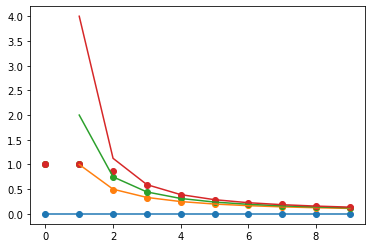

In [5]:
n_abscisse = np.arange(10)
r_ord0 = v_inf(0, n_abscisse)
r_ord1 = v_inf(1, n_abscisse)
r_ord2 = v_inf(2, n_abscisse)
r_ord3 = v_inf(3, n_abscisse)
r_ord4 = v_inf(4, n_abscisse)

plt.scatter(n_abscisse, r_ord0)
plt.scatter(n_abscisse, r_ord1)
plt.scatter(n_abscisse, r_ord2)
plt.scatter(n_abscisse, r_ord3)

plt.plot(n_abscisse, 0 / n_abscisse ** 0)
plt.plot(n_abscisse, 1 / n_abscisse ** 1)
plt.plot(n_abscisse, (n_abscisse + 1) / n_abscisse**2)
plt.plot(n_abscisse, (n_abscisse**2 + 2 * n_abscisse + 1) / n_abscisse**3)

plt.show()

$\forall k > 0, \forall n \geq k, q_{n}^{k} = \frac{(n + 1)^{k - 1}}{n^{k}}$

In [17]:
q = lambda k, n: (n + 1) ** (k - 1) / n ** k

In [34]:
n = 100
q(n, n), np.exp(1) / (n + 1)

(0.026780334944767586, 0.026913681469891537)

<ipython-input-10-f7421314d5e5>:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n_abscisse, (n_abscisse**2 + 2 * n_abscisse + 1) / n_abscisse**3)


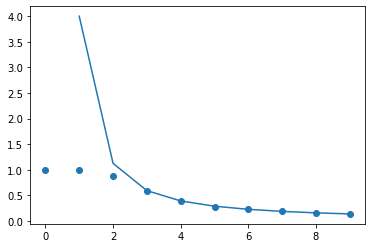

In [10]:
# plt.scatter(n_abscisse, r_ord0)
# plt.scatter(n_abscisse, r_ord1)
# plt.scatter(n_abscisse, r_ord2)
plt.scatter(n_abscisse, r_ord3)

# plt.plot(n_abscisse, 0 / n_abscisse ** 0)
# plt.plot(n_abscisse, 1 / n_abscisse ** 1)
# plt.plot(n_abscisse, (n_abscisse + 1) / n_abscisse**2)
plt.plot(n_abscisse, (n_abscisse**2 + 2 * n_abscisse + 1) / n_abscisse**3)


plt.show()

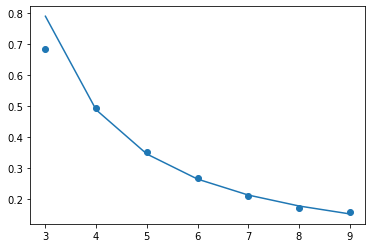

In [16]:
start=3
abscisse=n_abscisse[start:]
plt.scatter(abscisse, r_ord4[start:])
plt.plot(abscisse, (abscisse + 1)**3 / abscisse**4)

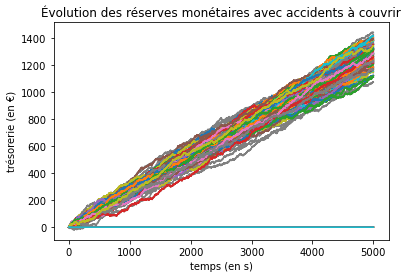

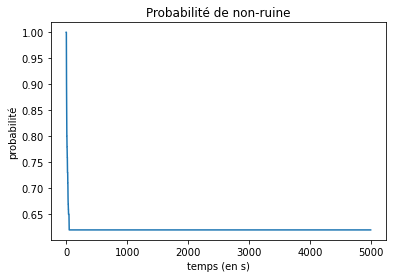

<ipython-input-6-998685281a37>:30: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(phi - phi[-1]))


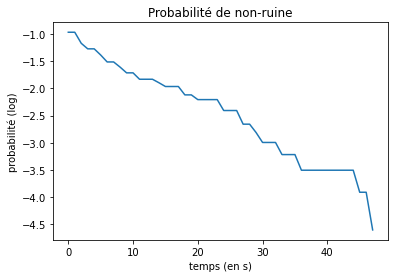

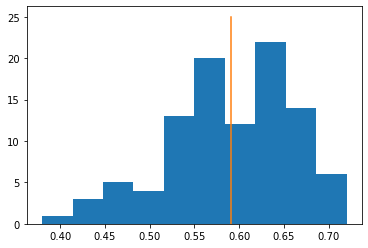

In [6]:
u0 = 3
n = 3
M = 100  # Nombre de trajectoires
N = 5000 # Durée totale (en s)
T = np.arange(N)  # Indices des temps
c = 1  # Débit d'argent rentrant (en €/tour)
lam = 1 / (n + 1)
dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
S = np.cumsum(dS, axis=1)
u = u0 + c * T - S
u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
u_cutted = u*(u_alive)
phi = np.mean(u_alive, axis=0)
expt = vphi(u0, n * np.ones(100))
phi_inf = np.mean(expt)
plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.plot(u.T, c='gray')
plt.plot(u_cutted.T)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité")
plt.plot(phi)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité (log)")
plt.plot(np.log(phi - phi[-1]))
plt.show()
plt.hist(expt)
plt.plot([phi_inf, phi_inf], [0, 25])
plt.show()